# **Desenvolvimento de um Modelo Preditivo para Identificação de Risco Cardiovascular com Deploy no Streamlit**


## Introdução
O presente projeto visa a elaboração de um modelo preditivo para identificar o risco de desenvolvimento de doenças cardiovasculares em pacientes, utilizando a base de dados "DoençaVascular.xlsx". A partir desse modelo, pretende-se criar uma aplicação interativa com o Streamlit, com o objetivo de auxiliar médicos na compreensão de como determinados fatores demográficos, comportamentos de saúde e marcadores biológicos impactam o desenvolvimento dessas enfermidades. Abaixo está descrito o plano para análise e desenvolvimento do projeto.



## Dados do DataFrame

*O dataset contém as seguintes variáveis:*

* Idade: Idade do(a) participante.

* Sexo: Sexo do participante (masculino/feminino).

* Altura: Altura medida em centímetros.

* Peso: Peso medido em quilogramas.

* PressãoArterialSistólica: Leitura da pressão arterial sistólica feita pelo paciente.

* PressãoArterialDiastólica: Leitura da pressão arterial diastólica feita no paciente.

* Colesterol: Nível de colesterol total lido como mg/dl em uma escala de 0 a 5+ unidades (inteiro). Cada unidade denota aumento/diminuição de 20 mg/dL, respectivamente.

* Glicose: Nível de glicose lido como mmol/l em uma escala de 0 a 16+ unidades (número inteiro). Cada unidade denota aumento/diminuição em 1 mmol/L, respectivamente.

* Fumante: Indica se a pessoa fuma ou não (binário: 0 = Não, 1 = Sim).

* UsaAlcool: Indica se a pessoa bebe álcool ou não (binário: 0 = Não, 1 = Sim).

* AtivoFisicamente: Indica se a pessoa é fisicamente ativa ou não (binário: 0 = Não, 1 = Sim).

* DoencaVascular: Indica se a pessoa sofre de doenças cardiovasculares ou não (binário: 0 = Não, 1 = Sim).

## Objetivo

Criar uma ferramenta preditiva e interpretável que auxilie médicos na tomada de decisão, promovendo um maior entendimento dos fatores de risco associados às doenças cardiovasculares e, consequentemente, contribuindo para a prevenção e tratamento eficazes.


## Etapas do Desenvolvimento

### 1. Exploração dos Dados:

* Realizar a importação da base de dados "DoençaVascular.xlsx".

* Verificar a presença de valores ausentes ou inconsistentes.

* Analisar distribuição de cada variável e identificar correlações.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
dados = pd.read_excel('C:\\Users\\tamir\\OneDrive\\Área de Trabalho\\Pos-Tech Fase 4\\desafio\\DoençaVascular.xlsx')

In [3]:
dados.head()

,index,id,Idade,Genero,Altura,Peso,PressaoArterialSistolica,PressaoArterialDiastolica,Colesterol,Glicose,Fumante,UsaAlcool,AtivoFisicamente,DoencaVascular
0,0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
dados_clean = dados

In [5]:
dados_clean.shape

(70000, 14)

In [6]:
dados_clean = dados_clean.drop('index', axis=1)

In [7]:
dados_clean.isnull().sum()

# verificando se há valores nulos

id                           0
Idade                        6
Genero                       0
Altura                       0
Peso                         0
PressaoArterialSistolica     0
PressaoArterialDiastolica    0
Colesterol                   0
Glicose                      0
Fumante                      0
UsaAlcool                    0
AtivoFisicamente             0
DoencaVascular               0
dtype: int64

In [8]:
dados_clean = dados_clean.dropna()
# neste caso a idade é uma descrição importante para fazer a predição, portanto, será necessário deletar esses dados nulos.

In [9]:
dados_clean.columns

Index(['id', 'Idade', 'Genero', 'Altura', 'Peso', 'PressaoArterialSistolica',
       'PressaoArterialDiastolica', 'Colesterol', 'Glicose', 'Fumante',
       'UsaAlcool', 'AtivoFisicamente', 'DoencaVascular'],
      dtype='object')

In [10]:
dados_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69994 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         69994 non-null  int64  
 1   Idade                      69994 non-null  float64
 2   Genero                     69994 non-null  int64  
 3   Altura                     69994 non-null  int64  
 4   Peso                       69994 non-null  float64
 5   PressaoArterialSistolica   69994 non-null  int64  
 6   PressaoArterialDiastolica  69994 non-null  int64  
 7   Colesterol                 69994 non-null  int64  
 8   Glicose                    69994 non-null  int64  
 9   Fumante                    69994 non-null  int64  
 10  UsaAlcool                  69994 non-null  int64  
 11  AtivoFisicamente           69994 non-null  int64  
 12  DoencaVascular             69994 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 7.5 MB


In [11]:
# Ajustar tipos
dados_clean['Idade'] = dados_clean['Idade'].round().astype(int)  # Arredonda Idade para inteiro
dados_clean['Genero'] = dados['Genero'].replace({1: 0, 2: 1})  # Genero: 0 (Masculino), 1 (Feminino)

In [12]:
dados_clean['id'] = dados_clean['id'].astype('object')
dados_clean['Genero'] = dados_clean['Genero'].astype('object')

In [13]:
dados_clean.nunique()
# Verificando quantos valores há em cada coluna/variavel:

id                           69994
Idade                           28
Genero                           2
Altura                         109
Peso                           287
PressaoArterialSistolica       153
PressaoArterialDiastolica      157
Colesterol                       3
Glicose                          3
Fumante                          2
UsaAlcool                        2
AtivoFisicamente                 2
DoencaVascular                   2
dtype: int64

In [14]:
# id neste contexto nao tem validade
dados_clean_semID = dados_clean.drop('id', axis=1)

<Axes: >

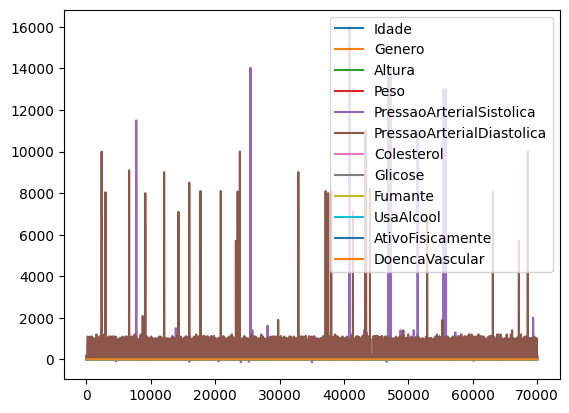

In [15]:
dados_clean_semID.plot()

In [16]:
# Verificando a Correlação:
corr = dados_clean.select_dtypes(include=[np.number]).corr()

<Axes: >

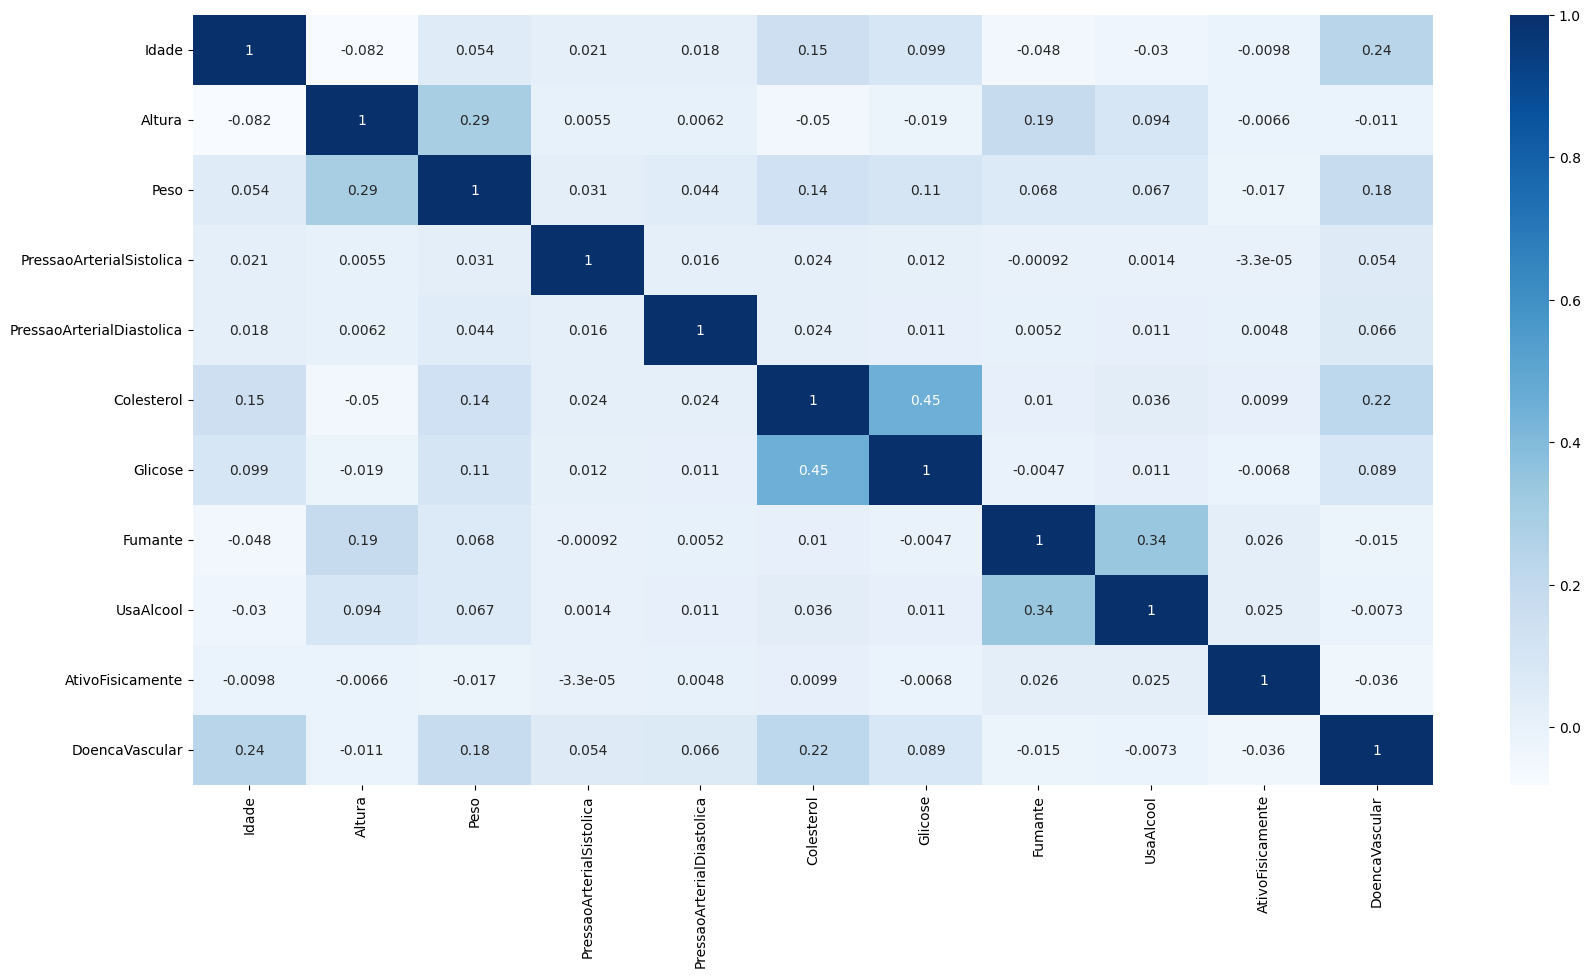

In [17]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap="Blues", annot=True)
# Maior correlação são: Altura x Peso // colesterol x glicose  

### 2. Preparação dos Dados:

* Normalizar variáveis contínuas, como altura, peso.

* Codificar variáveis categóricas, como sexo.

* Dividir os dados em conjunto de treino e teste.

* ### *Explorando as variáveis quantitativas: Glicose, Colesterol, PressaoArterialDiastolica, PressaoArterialSistolica, Altura, Idade.*

In [18]:
colunas_quantitativas = ['PressaoArterialDiastolica', 'PressaoArterialSistolica', 'Altura', 'Idade']

In [19]:
dados_clean[colunas_quantitativas].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PressaoArterialDiastolica,69994.0,96.63,188.48,-70.0,80.0,80.0,90.0,11000.0
PressaoArterialSistolica,69994.0,128.82,154.02,-150.0,120.0,120.0,140.0,16020.0
Altura,69994.0,164.36,8.21,55.0,159.0,165.0,170.0,250.0
Idade,69994.0,53.34,6.77,30.0,48.0,54.0,58.0,65.0


**PressaoArterialDiastolica**
* Média: 96.63
* Desvio padrão: 188.48
* Valores atípicos: -70 a 11.000
* Os valores negativos e extremamente altos são errôneos. A pressão arterial diastólica deveria estar em uma faixa normal entre 40 e 120 mmHg. Esses valores precisam ser corrigidos ou removidos.

**PressaoArterialSistolica**
* Média: 128.82
* Desvio padrão: 154.02
* Valores atípicos: -150 a 16.020
* Assim como na pressão diastólica, os valores negativos e acima de 160 são anormais e precisam ser corrigidos.

**Altura**
* Média: 164.36 cm
* Desvio padrão: 8.21 cm
* Intervalo: 55 a 250 cm
* Embora a altura média e o desvio padrão estejam razoáveis, um valor mínimo de 55 cm e máximo de 250 cm podem ser plausíveis para o contexto de um estudo de saúde, mas valores muito baixos ou altos podem indicar erros.

**Idade**
* Média: 53.34 anos
* Desvio padrão: 6.77 anos
* Intervalo: 30 a 65 anos
* A idade parece estar bem distribuída.

In [20]:
def plotar_boxplot_geral(dataset, y):
    ax = sns.boxplot(data=dataset, y=y)
    ax.figure.set_size_inches(4,4)
    plt.xticks(rotation=45)

In [21]:
# Deletando dados que contem 'outlier', como não há nenhuma informação para considerar a altura dos participantes,
# iremos deixas apenas participantes acima de 140cm e menores que 240cm de altura.
dados_clean = dados_clean[(dados_clean['Altura'] >= 140) & (dados_clean['Altura'] <= 240)]

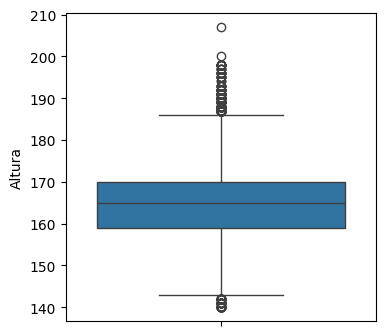

In [22]:
plotar_boxplot_geral(dados_clean, 'Altura')

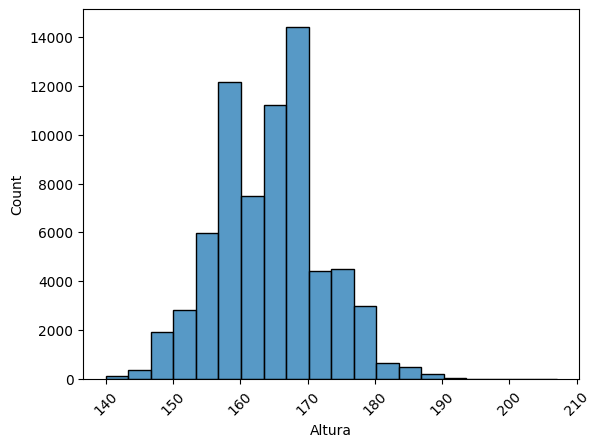

In [23]:
sns.histplot(data=dados_clean, x='Altura', bins=20) 
plt.xticks(rotation=45)
plt.show()

In [24]:
baixo_40 = dados_clean[dados_clean['PressaoArterialDiastolica'] < 40].shape[0]
maior_120 = dados_clean[dados_clean['PressaoArterialDiastolica'] > 120].shape[0]
print(baixo_40)
print(maior_120)

58
1055


In [25]:
# A pressão arterial diastólica deveria estar em uma faixa normal entre 40 e 120 mmHg. Esses valores serão removidos.
dados_clean = dados_clean[(dados_clean['PressaoArterialDiastolica'] >= 40) & (dados_clean['PressaoArterialDiastolica'] <= 120)] 

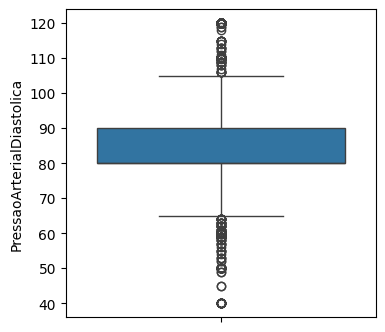

In [26]:
plotar_boxplot_geral(dados_clean, 'PressaoArterialDiastolica')

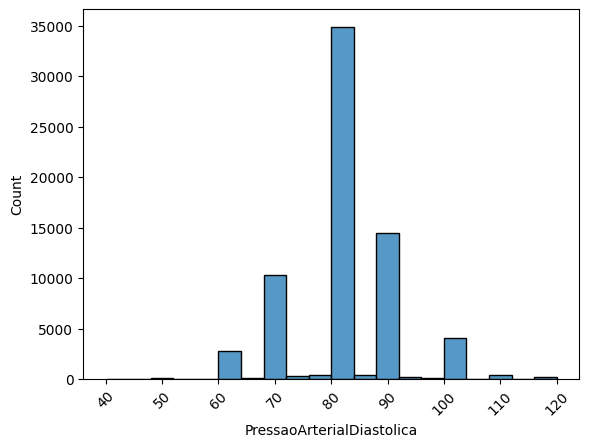

In [27]:
sns.histplot(data=dados_clean, x='PressaoArterialDiastolica', bins=20) 
plt.xticks(rotation=45)
plt.show()

In [28]:
# Os valores negativos e acima de 160 são anormais e precisam ser corrigidos
dados_clean = dados_clean[(dados_clean['PressaoArterialSistolica'] >= 90) & (dados_clean['PressaoArterialSistolica'] <= 160)] 

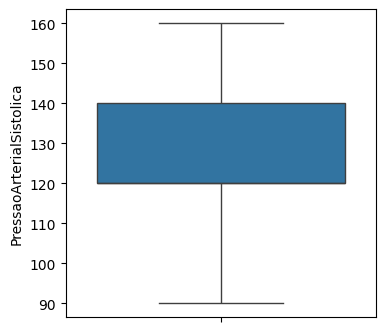

In [29]:
plotar_boxplot_geral(dados_clean, 'PressaoArterialSistolica')

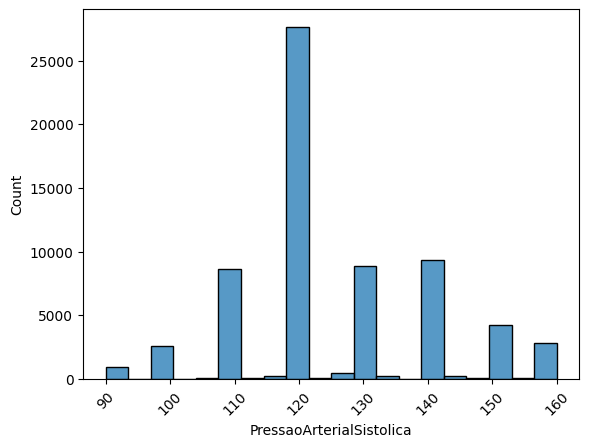

In [30]:
sns.histplot(data=dados_clean, x='PressaoArterialSistolica', bins=20) 
plt.xticks(rotation=45)
plt.show()

* ### *Explorando as variáveis qualitativas: DoencaVascular, AtivoFisicamente, UsaAlcool, Fumante, Genero.*

In [31]:
dados_clean['DoencaVascular'].value_counts(normalize=True)*100
# Cerca de 50% das pessoas não têm doença vascular, enquanto 49% é uma porcentagem significativa entre os que têm a condição.

DoencaVascular
0    51.411499
1    48.588501
Name: proportion, dtype: float64

In [32]:
dados_clean['AtivoFisicamente'].value_counts(normalize=True)*100
# A maior parte da amostra, 80,37%, pratica atividade física, enquanto 19,63% não adotam um estilo de vida ativo.

AtivoFisicamente
1    80.387282
0    19.612718
Name: proportion, dtype: float64

In [33]:
dados_clean['UsaAlcool'].value_counts(normalize=True)*100
# A grande maioria das pessoas não consome álcool, representando 94,62% da amostra, enquanto apenas 5,38% indicam que fazem uso de álcool.

UsaAlcool
0    94.734399
1     5.265601
Name: proportion, dtype: float64

In [34]:
dados_clean['Fumante'].value_counts(normalize=True)*100
# A grande maioria da amostra, 91,19%, não é fumante, enquanto 8,81% são fumantes.

Fumante
0    91.262936
1     8.737064
Name: proportion, dtype: float64

In [35]:
dados_clean['Genero'].value_counts(normalize=True)*100
# Na amostra, 65,05% são do gênero masculino e 34,95% são do gênero feminino.

Genero
0    65.271891
1    34.728109
Name: proportion, dtype: float64

In [36]:
dados_clean.columns

Index(['id', 'Idade', 'Genero', 'Altura', 'Peso', 'PressaoArterialSistolica',
       'PressaoArterialDiastolica', 'Colesterol', 'Glicose', 'Fumante',
       'UsaAlcool', 'AtivoFisicamente', 'DoencaVascular'],
      dtype='object')

In [37]:
dados_clean.shape

(66773, 13)

* ### *Explorando as variáveis qualitativas ordinais: Glicose e Colesterol.*

In [38]:
# Substituir os valores para 0, 1, 2 (mantendo a ordem)
dados_clean['Glicose'] = dados_clean['Glicose'].replace({1: 0, 2: 1, 3: 2})
dados_clean['Colesterol'] = dados_clean['Colesterol'].replace({1: 0, 2: 1, 3: 2})

In [39]:
dados_clean['Glicose'].value_counts(normalize=True)*100
# A distribuição dos dados de glicose mostra que 85,26% das pessoas possuem níveis classificados como 0 (baixo), 
# enquanto 7,54% têm níveis classificados como 2 (alto) e 7,20% estão na categoria 1 (médio).

Glicose
0    85.260509
2     7.537478
1     7.202013
Name: proportion, dtype: float64

In [40]:
dados_clean['Colesterol'].value_counts(normalize=True)*100
#A distribuição dos dados de colesterol revela que 75,48% das pessoas possuem níveis classificados como 0 (baixo), 
# 13,28% têm níveis classificados como 1 (médio) e 11,24% estão na categoria 2 (alto).

Colesterol
0    75.481108
1    13.276324
2    11.242568
Name: proportion, dtype: float64

In [41]:
dados_clean = dados_clean.copy()

* ### *Análise das variáveis em relação ao Target*

In [42]:
descricao = dados_clean.groupby('DoencaVascular').mean()
print(descricao)

                          id      Idade    Genero      Altura       Peso  \
DoencaVascular                                                             
0               49899.228378  51.705584  0.345131  164.574908  71.528681   
1                50100.90781  54.926304  0.349556  164.365553  76.423333   

                PressaoArterialSistolica  PressaoArterialDiastolica  \
DoencaVascular                                                        
0                             119.292639                  78.032363   
1                             131.932961                  83.919369   

                Colesterol   Glicose   Fumante  UsaAlcool  AtivoFisicamente  
DoencaVascular                                                               
0                 0.213202  0.174109  0.092517   0.055085          0.818783  
1                 0.510418  0.274257  0.081926   0.050086          0.788096  


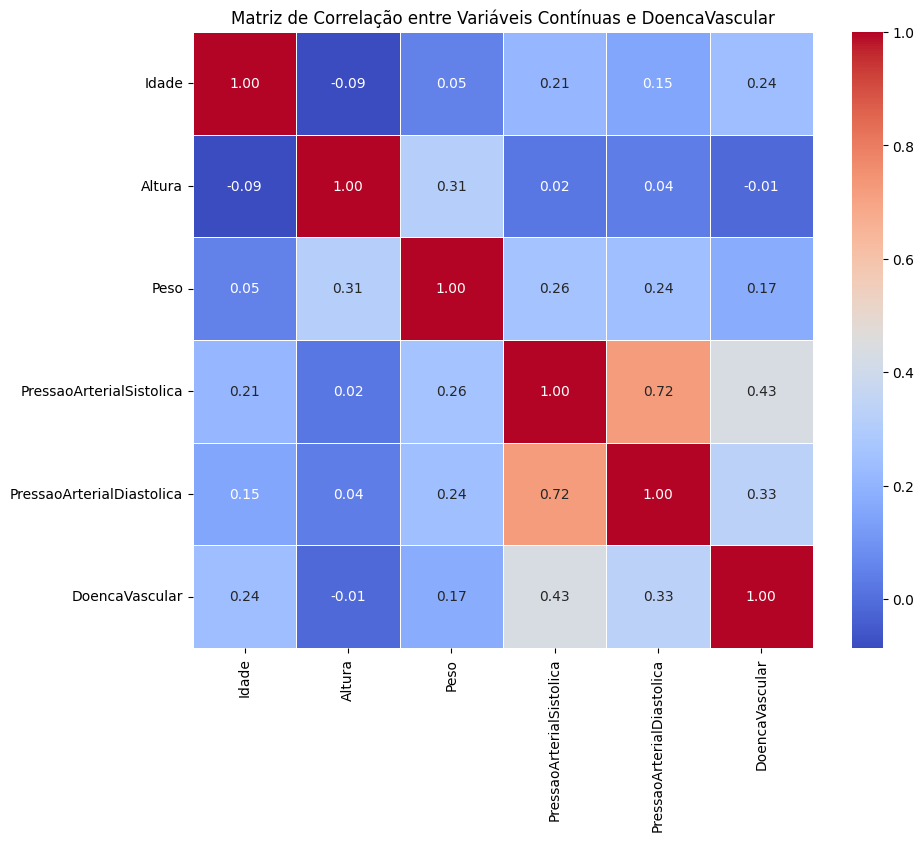

In [43]:
variaveis_continuas = ['Idade', 'Altura', 'Peso', 'PressaoArterialSistolica', 'PressaoArterialDiastolica']

# Adicionar a variável target à análise de correlação
dados_continuos = dados_clean[variaveis_continuas + ['DoencaVascular']]

# Calcular a matriz de correlação
correlacao = dados_continuos.corr()

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Contínuas e DoencaVascular')
plt.show()

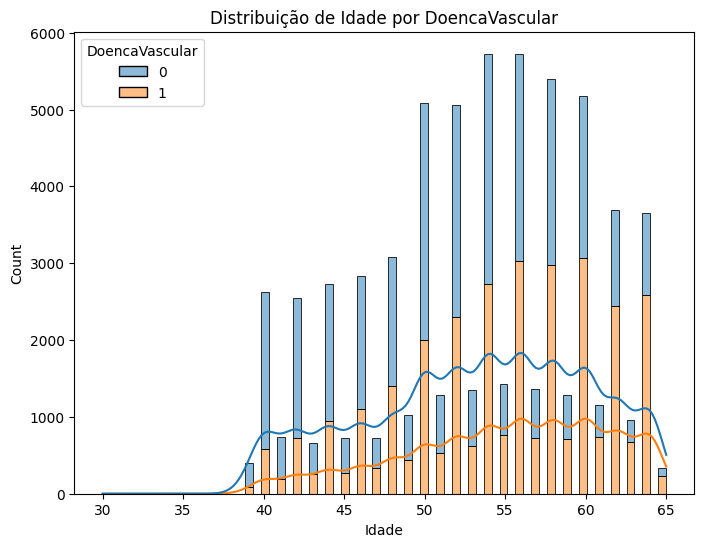

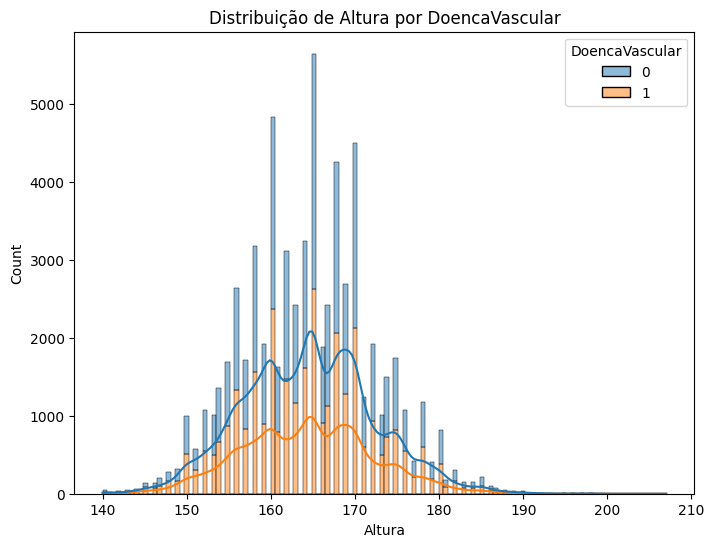

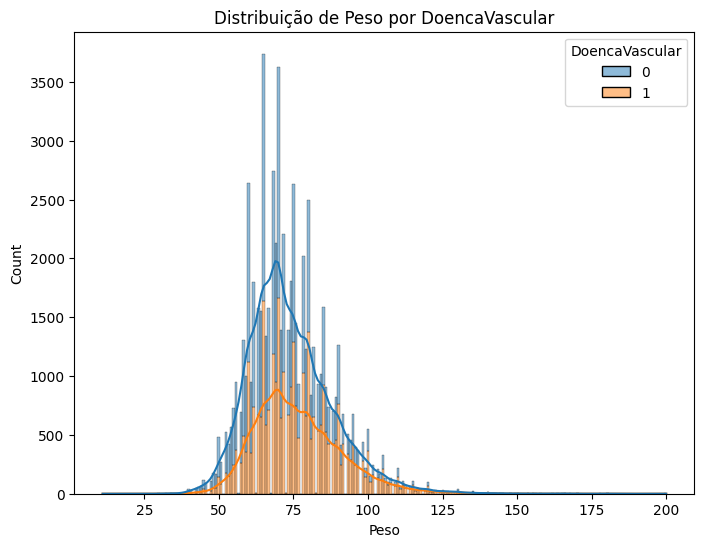

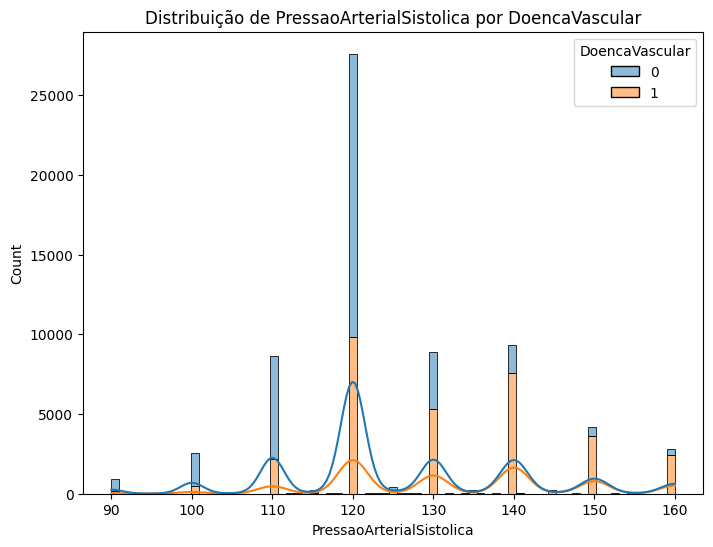

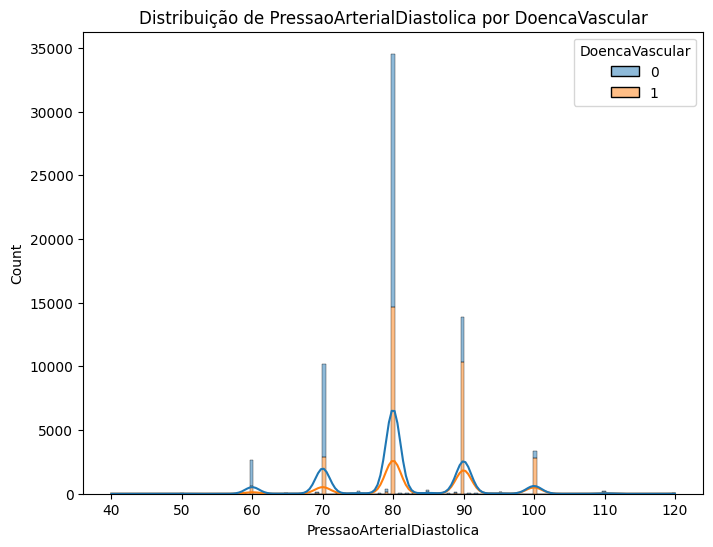

In [44]:
# Plotar histogramas para cada variável, divididos por 'DoencaVascular'
for var in variaveis_continuas:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=dados_clean, x=var, hue='DoencaVascular', kde=True, multiple='stack')
    plt.title(f'Distribuição de {var} por DoencaVascular')
    plt.show()



**Pessoas com idade acima de 50 anos parecem ter um risco maior de desenvolver a doença vascular. A altura não mostra uma relação significativa. O peso segue uma distribuição normal. A pressão arterial sistólica, quando superior a 120, parece aumentar as chances de desenvolver a doença, enquanto para a pressão arterial diastólica, valores acima de 80 indicam uma maior propensão à doença.**

* ### *Dividindo os dados em conjunto de treino e teste.*

In [45]:
dados_clean.head()

,id,Idade,Genero,Altura,Peso,PressaoArterialSistolica,PressaoArterialDiastolica,Colesterol,Glicose,Fumante,UsaAlcool,AtivoFisicamente,DoencaVascular
0,0,50,1,168,62.0,110,80,0,0,0,0,1,0
1,1,55,0,156,85.0,140,90,2,0,0,0,1,1
2,2,52,0,165,64.0,130,70,2,0,0,0,0,1
3,3,48,1,169,82.0,150,100,0,0,0,0,1,1
4,4,48,0,156,56.0,100,60,0,0,0,0,0,0


In [46]:
SEED = 1561651
df_treino, df_teste = train_test_split(dados_clean, test_size=0.2, random_state=SEED)

In [47]:
df_treino.shape

(53418, 13)

In [48]:
df_teste.shape

(13355, 13)

In [84]:
df_treino_copy = df_treino.copy()
df_treino_copy = df_treino.copy()
dados_clean = dados_clean.copy()

In [85]:
# Salvando em caso mude algo em um futuro:
df_treino.to_csv('train.csv', index=False)
df_teste.to_csv('test.csv', index=False)
dados_clean.to_csv('dados_clean', index=False)

### 3. Pipeline de Dados:

Para garantir um fluxo organizado e eficiente dos dados para o modelo preditivo, será criada uma pipeline com as seguintes etapas:

* Leitura e carregamento dos dados: Importar os dados do arquivo "DoençaVascular.xlsx".

* Tratamento de valores ausentes: Identificar e corrigir dados ausentes ou inconsistentes.

* Transformação de dados: Normalizar variáveis contínuas (altura, peso, colesterol, glicose) e codificar variáveis categóricas (sexo).

* Divisão do dataset: Separar os dados em conjuntos de treino (80%) e teste (20%).

* Balanceamento de classes: Aplicar técnicas como oversampling ou undersampling, se necessário, para lidar com possíveis desbalanceamentos nos dados.

* Feature engineering: Criar novas variáveis relevantes, se aplicável, para melhorar o desempenho do modelo.

* Pré-processamento final: Garantir que todos os dados estejam padronizados antes de serem enviados para o modelo.



In [51]:
#pip install imbalanced-learn

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
# BaseEstimator: Fornece metodos que são necessários para fazer algumas transformações que o modelo vai precisar.
# TransformerMixin: Permite que os dados sejam ajustados e transformados dentro das classes, define as classes da Pipeline

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
#MinMaxScaler: ele consegue normalizar os dados entre 0 e 1, para as variaveis numericas do df.
#OneHotEncoder: para os dados Strings, esse modelo vai atribuir valore de 0 a 1 para cada coluna que contem string. Ou seja, vai criar outras colunas, onde a coluna vai ter o nome de uma variavel, por exemplo: Estado_Civil  vai deixar de existir e tera a coluna Casado, Solteiro etc, onde para cada linha que contem a confirmacao de casado tera o dados 1 e para as putras linhas sera 0. E assim por diante. 
#OrdinalEncoder: neste caso vai ser parecido com o de cima, mas ka variavel contem uma ordem de "valores", como é o caso do grau_escolaridade, onde ensino fundamental tem um peso e o restante contem outro peso


from imblearn.over_sampling import SMOTE

In [53]:
# Criar classes nos proporcional organizar dados e funcionalidade, serve para agrupar as funções em um determinado objeto;
# Primeira classe que irei criar, vai retirar a coluna que nao tem significancia para o treinamento do modelo, "id":

class DropFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, feature_to_drop=['id']): 
        self.feature_to_drop = feature_to_drop 
    def fit(self, df):                                            
        return self                
# O fit é usado quando uma transformação precisa aprender alguma coisa com os dados antes de transformar. Aqui, como só queremos remover colunas, nada precisa ser aprendido, então ele apenas retorna self.                                                                #     
    def transform(self, df):                                    # 
        if (set(self.feature_to_drop).issubset(df.columns)):        
            df.drop(self.feature_to_drop, axis=1, inplace= True)        
# É o método que realmente transforma o conjunto de dados, axis=1 significa que ele está removendo colunas (em vez de linhas), e inplace=True indica que a remoção será feita diretamente no DataFrame, sem necessidade de criar uma cópia.
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df    

In [54]:
# Normalizar os dados entre 0 e 1, para as variaveis numericas do df:
class MinMAx(BaseEstimator, TransformerMixin):
    def __init__(self, min_max_scaler=['Idade', 'Altura', 'Peso', 'PressaoArterialSistolica', 'PressaoArterialDiastolica']):
        self.min_max_scaler = min_max_scaler
    
    def fit(self, df):
        return self
    
    def transform(self, df):
        if (set(self.min_max_scaler ).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler]= min_max_enc.fit_transform(df[self.min_max_scaler])
            return df
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [55]:
class OneHotEncodingNames(BaseEstimator, TransformerMixin):
    def __init__(self, OneHotEncoding=['Fumante', 'UsaAlcool', 'AtivoFisicamente']):
        self.OneHotEncoding = OneHotEncoding
    
    def fit(self, df):
        return self
#one_hot_enc: Essa função interna aplica a codificação one-hot às colunas especificadas e cria um DataFrame com as novas colunas codificadas.
    def transform(self, df):
        if (set(self.OneHotEncoding).issubset(df.columns)):
            def one_hot_enc(df, OneHotEncoding):  
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[OneHotEncoding])
                feature_names = one_hot_enc.get_feature_names_out(OneHotEncoding)
                df = pd.DataFrame(one_hot_enc.transform(df[self.OneHotEncoding]).toarray(),
                                  columns= feature_names,index=df.index)
                return df
            
#concat_with_rest: Essa função interna combina o DataFrame original (sem as colunas originais categóricas) com as novas colunas codificadas.                   
            def concat_with_rest(df, one_hot_enc_df, OneHotEncoding):   
                outras_features = [feature for feature in df.columns if feature not in OneHotEncoding]
                df_concat = pd.concat([one_hot_enc_df, df[outras_features]], axis=1)
                return df_concat

            df_OneHotEncoding = one_hot_enc(df, self.OneHotEncoding)
        
            df_full = concat_with_rest(df, df_OneHotEncoding, self.OneHotEncoding)
            return df_full
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [56]:
class OrdinalFeature(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_feature=['Colesterol', 'Glicose']):
        self.ordinal_feature = ordinal_feature
    
    def fit(self, df):
        return self
    
    def transform(self, df):
        missing_columns = [col for col in self.ordinal_feature if col not in df.columns]
        if missing_columns:
            print(f"As colunas seguintes não estão no DataFrame: {', '.join(missing_columns)}")
        else:
            ordinal_encoder = OrdinalEncoder()
            df[self.ordinal_feature] = ordinal_encoder.fit_transform(df[self.ordinal_feature])
        return df

In [57]:
class Oversample(BaseEstimator, TransformerMixin):
    def __init__(self, target_column='DoencaVascular'):
        self.target_column = target_column
    
    def fit(self, df):
        # Não é necessário treinar ou ajustar nada, apenas retorna self
        return self
    
    def transform(self, df):
        # Verifica se a coluna target (DoencaVascular) está presente no DataFrame
        if self.target_column in df.columns:
            # Aplica o SMOTE para balancear as classes
            oversample = SMOTE(sampling_strategy='minority')
            
            # Separa as variáveis independentes (X) e dependentes (y)
            X = df.drop(columns=[self.target_column])
            y = df[self.target_column]
            
            # Aplica o SMOTE para gerar amostras sintéticas
            X_bal, y_bal = oversample.fit_resample(X, y)
            
            # Cria um DataFrame com os dados balanceados
            df_bal = pd.concat([pd.DataFrame(X_bal, columns=X.columns), pd.DataFrame(y_bal, columns=[self.target_column])], axis=1)
            
            return df_bal
        else:
            print(f"A coluna target '{self.target_column}' não está no DataFrame.")
            return df

In [58]:
from sklearn.pipeline import Pipeline

In [59]:
def pipeline(df):
    
    pipeline= Pipeline([
        ('feature_dropper', DropFeatures()),
        ('min_max_scaler', MinMAx()),
        ('OneHotEncoding', OneHotEncodingNames()),
        ('Ordinal_feature', OrdinalFeature()),
        #('oversample', Oversample())
               
    ])
    
    df_pipeline = pipeline.fit_transform(df)
    return df_pipeline

* ### **TESTE**

In [60]:
treino = pipeline(df_treino)
treino.head()

,Fumante_0,Fumante_1,UsaAlcool_0,UsaAlcool_1,AtivoFisicamente_0,AtivoFisicamente_1,Idade,Genero,Altura,Peso,PressaoArterialSistolica,PressaoArterialDiastolica,Colesterol,Glicose,DoencaVascular
50951,1.0,0.0,1.0,0.0,0.0,1.0,0.571429,0,0.328358,0.286517,0.428571,0.500,0.0,0.0,0
341,1.0,0.0,1.0,0.0,0.0,1.0,0.800000,1,0.626866,0.387640,1.000000,0.625,2.0,0.0,1
36132,1.0,0.0,1.0,0.0,0.0,1.0,0.828571,0,0.208955,0.252809,0.428571,0.625,1.0,1.0,0
15291,1.0,0.0,1.0,0.0,0.0,1.0,0.514286,0,0.298507,0.224719,0.285714,0.375,0.0,0.0,0
35106,0.0,1.0,0.0,1.0,0.0,1.0,0.628571,0,0.582090,0.365169,0.428571,0.500,1.0,0.0,1


In [61]:
treino['DoencaVascular'].value_counts(normalize=True)*100

DoencaVascular
0    51.385301
1    48.614699
Name: proportion, dtype: float64

In [62]:
teste = pipeline(df_teste)
teste.head()

,Fumante_0,Fumante_1,UsaAlcool_0,UsaAlcool_1,AtivoFisicamente_0,AtivoFisicamente_1,Idade,Genero,Altura,Peso,PressaoArterialSistolica,PressaoArterialDiastolica,Colesterol,Glicose,DoencaVascular
7692,1.0,0.0,1.0,0.0,0.0,1.0,0.269231,1,0.310345,0.267442,0.285714,0.500,2.0,0.0,1
46060,1.0,0.0,1.0,0.0,0.0,1.0,0.807692,1,0.413793,0.343023,0.428571,0.500,0.0,0.0,1
68871,1.0,0.0,1.0,0.0,0.0,1.0,0.115385,0,0.431034,0.313953,0.857143,0.625,0.0,0.0,1
27266,1.0,0.0,1.0,0.0,0.0,1.0,0.500000,0,0.431034,0.302326,0.285714,0.500,0.0,0.0,1
1560,1.0,0.0,1.0,0.0,0.0,1.0,0.307692,0,0.413793,0.273256,0.285714,0.375,0.0,0.0,1


In [63]:
teste['DoencaVascular'].value_counts(normalize=True)*100

DoencaVascular
0    51.516286
1    48.483714
Name: proportion, dtype: float64

In [64]:
dados_clean.head()

,id,Idade,Genero,Altura,Peso,PressaoArterialSistolica,PressaoArterialDiastolica,Colesterol,Glicose,Fumante,UsaAlcool,AtivoFisicamente,DoencaVascular
0,0,50,1,168,62.0,110,80,0,0,0,0,1,0
1,1,55,0,156,85.0,140,90,2,0,0,0,1,1
2,2,52,0,165,64.0,130,70,2,0,0,0,0,1
3,3,48,1,169,82.0,150,100,0,0,0,0,1,1
4,4,48,0,156,56.0,100,60,0,0,0,0,0,0


In [65]:
dados_inteiros = pipeline(dados_clean)
dados_inteiros.head()

,Fumante_0,Fumante_1,UsaAlcool_0,UsaAlcool_1,AtivoFisicamente_0,AtivoFisicamente_1,Idade,Genero,Altura,Peso,PressaoArterialSistolica,PressaoArterialDiastolica,Colesterol,Glicose,DoencaVascular
0,1.0,0.0,1.0,0.0,0.0,1.0,0.571429,1,0.417910,0.269841,0.285714,0.500,0.0,0.0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.714286,0,0.238806,0.391534,0.714286,0.625,2.0,0.0,1
2,1.0,0.0,1.0,0.0,1.0,0.0,0.628571,0,0.373134,0.280423,0.571429,0.375,2.0,0.0,1
3,1.0,0.0,1.0,0.0,0.0,1.0,0.514286,1,0.432836,0.375661,0.857143,0.750,0.0,0.0,1
4,1.0,0.0,1.0,0.0,1.0,0.0,0.514286,0,0.238806,0.238095,0.142857,0.250,0.0,0.0,0


### 4. Seleção e Treinamento do Modelo:

* Testar diferentes algoritmos de machine learning, como Regressão Logística, Random Forest, e XGBoost.

* Avaliar o desempenho dos modelos com métricas como acurácia, precisão, recall e F1-score.



In [66]:
import sklearn
print(sklearn.__version__)

1.6.0


In [67]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [68]:
df_teste.head()

,Idade,Genero,Altura,Peso,PressaoArterialSistolica,PressaoArterialDiastolica,Colesterol,Glicose,Fumante,UsaAlcool,AtivoFisicamente,DoencaVascular
7692,0.269231,1,0.310345,0.267442,0.285714,0.500,2,0,0,0,1,1
46060,0.807692,1,0.413793,0.343023,0.428571,0.500,0,0,0,0,1,1
68871,0.115385,0,0.431034,0.313953,0.857143,0.625,0,0,0,0,1,1
27266,0.500000,0,0.431034,0.302326,0.285714,0.500,0,0,0,0,1,1
1560,0.307692,0,0.413793,0.273256,0.285714,0.375,0,0,0,0,1,1


In [69]:
X_teste = df_teste.drop('DoencaVascular', axis=1)
y_teste = df_teste['DoencaVascular']

In [70]:
X_treino = df_treino.drop('DoencaVascular', axis=1)
y_treino = df_treino['DoencaVascular']

In [71]:
SEED = 1561651
def roda_modelo(modelo):
    modelo.fit(X_treino, y_treino)
    
    prob_predict = modelo.predict_proba(X_teste)
    
    print(f'\n----------------Resultados {modelo} ------------------\n')
    
    data_sem_chances = np.sort(modelo.predict_proba(X_teste)[:, 0])
    data_com_chances = np.sort(modelo.predict_proba(X_teste)[:, 1])
    
    kstest = stats.ks_2samp(data_sem_chances, data_com_chances)
    print(f'Métrica KS: {kstest}')
    
    print('\n Confusion Matrix \n')
    predicao = modelo.predict(X_teste)
    
    cm = confusion_matrix(y_teste, predicao, normalize='true')
    fig, ax = plt.subplots(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", cbar=False,
                xticklabels=['sem_chances', 'com_chances'],
                yticklabels=['sem_chances', 'com_chances'])
    ax.set_title('Matriz de Confusão Normalizada', fontsize=16, fontweight='bold')
    ax.set_xlabel('Label predita', fontsize=18)
    ax.set_ylabel('Label verdadeira', fontsize=18)
    plt.show()

    print('\nClassification Report\n')
    print(classification_report(y_teste, predicao, zero_division=0))
    
    print('\nROC curve\n')
    y_proba = prob_predict[:, 1]  # Probabilidades da classe positiva
    fpr, tpr, _ = roc_curve(y_teste, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Linha de referência
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

* ### **Regressão Logistica**

In [72]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression(random_state=SEED)


----------------Resultados LogisticRegression(random_state=1561651) ------------------

Métrica KS: KstestResult(statistic=0.16959940097341825, pvalue=2.1401439255242324e-168, statistic_location=0.4943168105909042, statistic_sign=-1)

 Confusion Matrix 



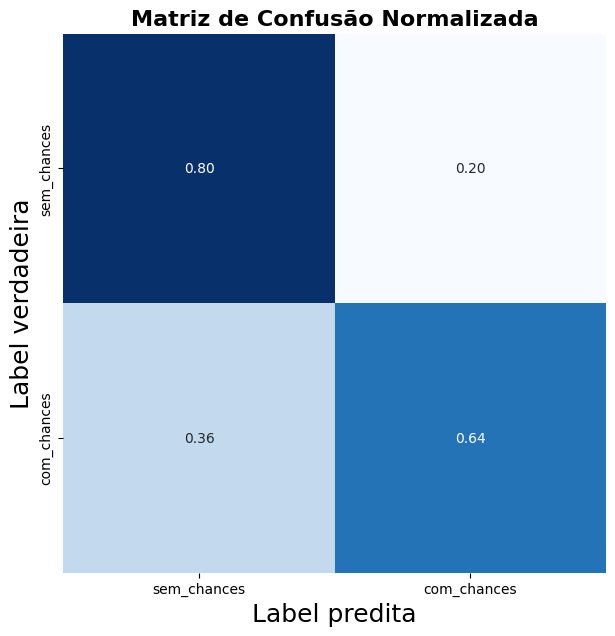


Classification Report

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6880
           1       0.75      0.64      0.69      6475

    accuracy                           0.72     13355
   macro avg       0.73      0.72      0.72     13355
weighted avg       0.73      0.72      0.72     13355


ROC curve



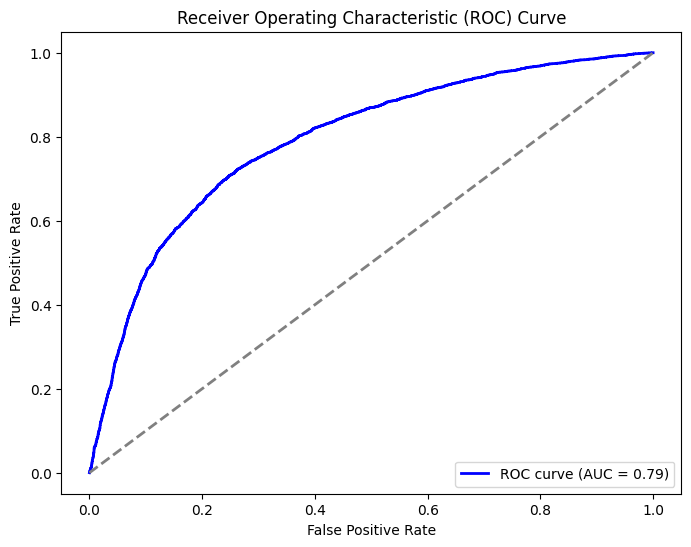

In [73]:
roda_modelo(modelo_logistico)

* ### **Arvore de Decisão**

In [74]:
from sklearn.tree import DecisionTreeClassifier

modelo_tree = DecisionTreeClassifier()


----------------Resultados DecisionTreeClassifier() ------------------

Métrica KS: KstestResult(statistic=0.055934107076001494, pvalue=1.3347430671006896e-18, statistic_location=0.5, statistic_sign=-1)

 Confusion Matrix 



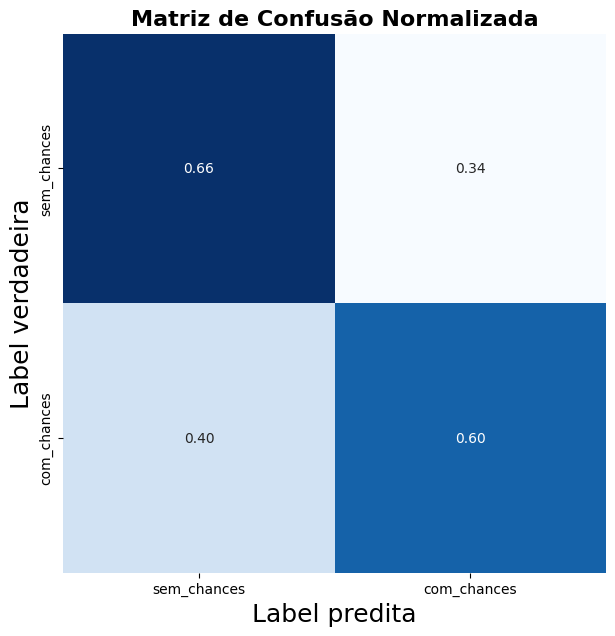


Classification Report

              precision    recall  f1-score   support

           0       0.63      0.66      0.65      6880
           1       0.62      0.60      0.61      6475

    accuracy                           0.63     13355
   macro avg       0.63      0.63      0.63     13355
weighted avg       0.63      0.63      0.63     13355


ROC curve



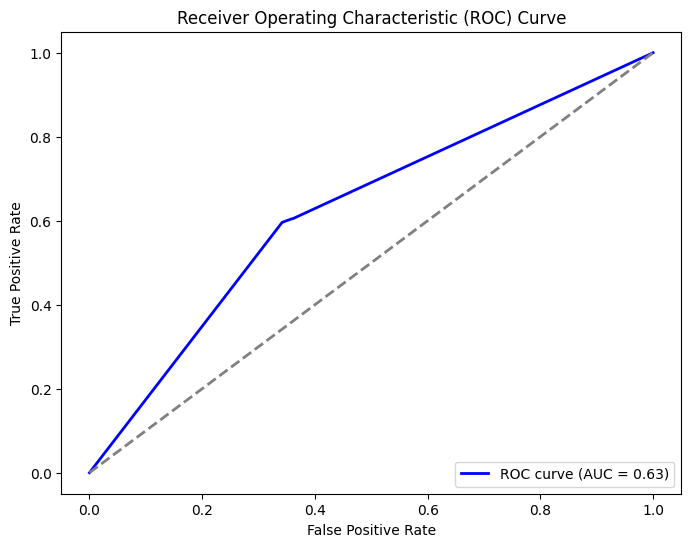

In [75]:
roda_modelo(modelo_tree)

* ### **GradientBoostingClassifier**

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_xgb = GradientBoostingClassifier() 


----------------Resultados GradientBoostingClassifier() ------------------

Métrica KS: KstestResult(statistic=0.14137027330587798, pvalue=6.582293025651677e-117, statistic_location=0.5599305187671838, statistic_sign=-1)

 Confusion Matrix 



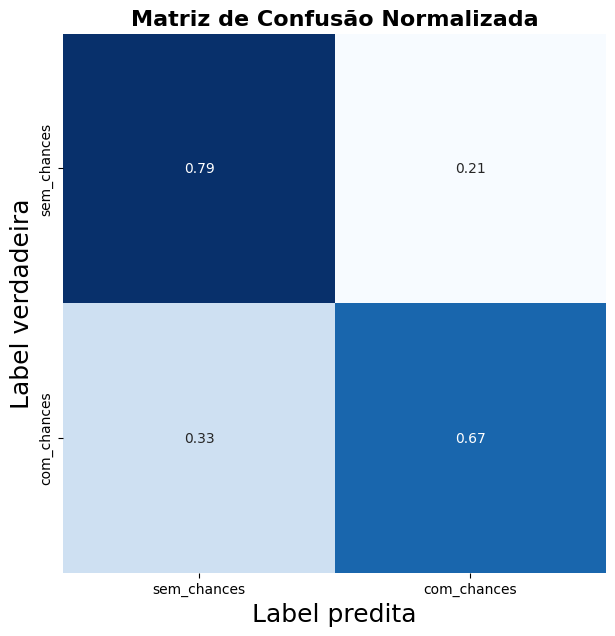


Classification Report

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6880
           1       0.75      0.67      0.71      6475

    accuracy                           0.73     13355
   macro avg       0.74      0.73      0.73     13355
weighted avg       0.74      0.73      0.73     13355


ROC curve



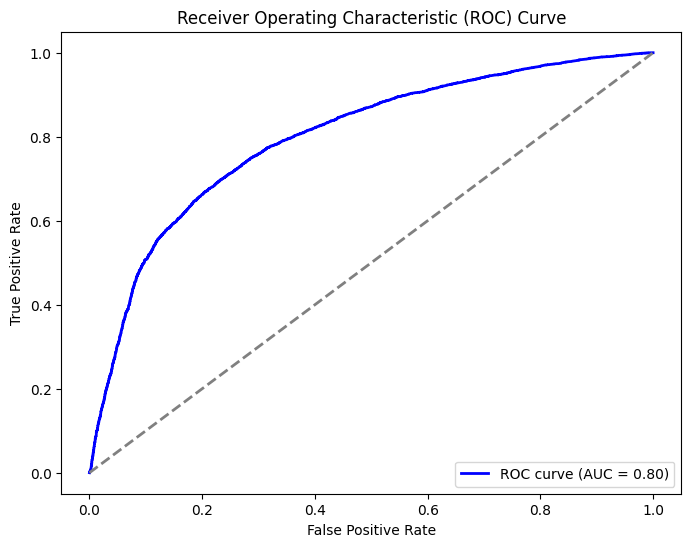

In [77]:
roda_modelo(modelo_xgb)

In [78]:
import joblib

In [79]:
joblib.dump(modelo_xgb, 'xgb.vascular')

['xgb.vascular']

In [83]:
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

print(f"Joblib version: {joblib.__version__}")


"""
numpy==1.25.2
pandas==2.2.3
scikit-learn==1.6.0
streamlit>=1.12.0
boto3==1.20.34
joblib>=0.14,<=1.4.2
streamlit-lottie==0.0.3
"""

NumPy version: 1.25.2
Pandas version: 2.2.3
Scikit-learn version: 1.6.0
Joblib version: 1.4.2


'\nnumpy==1.25.2\npandas==2.2.3\nscikit-learn==1.6.0\nstreamlit>=1.12.0\nboto3==1.20.34\njoblib>=0.11,<=1.0.1\nstreamlit-lottie==0.0.3\n'

### 5. Validação do Modelo:

* Realizar validação cruzada para evitar overfitting.

* Ajustar hiperparâmetros utilizando técnicas como Grid Search ou Random Search.



* *Validação Cruzada: divide os dados em múltiplos subconjuntos (folds) para avaliar a performance do modelo de maneira mais robusta.*

```
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(random_state=SEED)

# Validação cruzada com 5 folds
scores = cross_val_score(modelo, X_treino, y_treino, cv=5, scoring='accuracy')

print(f"Acurácia média: {scores.mean():.4f}")
print(f"Desvio padrão: {scores.std():.4f}")
```

* *Grid Search: Testa exaustivamente todas as combinações possíveis de hiperparâmetros. Ideal para problemas menores.*

```

from sklearn.model_selection import GridSearchCV

# Definindo os hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Configurando Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=SEED), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy')

# Executando a busca
grid_search.fit(X_treino, y_treino)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor score: {grid_search.best_score_:.4f}")
```

* *Random Search: Busca aleatória por combinações de hiperparâmetros. É mais eficiente quando o espaço de busca é grande.*

```
from sklearn.model_selection import RandomizedSearchCV

# Definindo os hiperparâmetros e o número de iterações
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   scoring='accuracy',
                                   random_state=SEED)

# Executando a busca
random_search.fit(X_treino, y_treino)

print(f"Melhores parâmetros: {random_search.best_params_}")
print(f"Melhor score: {random_search.best_score_:.4f}")
```

* *Avaliação do Modelo com os Dados de Teste: Após ajustar os hiperparâmetros, avalie o modelo final no conjunto de teste.*

```
# Usando o melhor modelo encontrado
melhor_modelo = grid_search.best_estimator_

# Avaliando no conjunto de teste
from sklearn.metrics import accuracy_score, classification_report

y_pred = melhor_modelo.predict(X_teste)

print(f"Acurácia no teste: {accuracy_score(y_teste, y_pred):.4f}")
print(classification_report(y_teste, y_pred))
```

### 6. Implementação da Aplicação:

* Desenvolver uma interface intuitiva no Streamlit para entrada de dados e exibição dos resultados.

* Exibir explicações interpretáveis sobre como cada fator contribui para o risco predito.



### 7. Implantação do Modelo:

* Realizar o deploy da aplicação no Streamlit, garantindo que esteja acessível para médicos e profissionais de saúde.